# CareerCon 2019

Competition's data overview.

[Link to the competition](https://www.kaggle.com/c/career-con-2019/data).

In [45]:
%matplotlib notebook
%reload_ext autoreload
%autoreload 2

In [2]:
import pandas as pd

In [3]:
from basedir import TRAIN, TARGET, TEST
from info import x_cols, y_cols
from utils import to_feather, from_feather

# Convert Into Binary Format

In [ ]:
x_trn = pd.read_csv(TRAIN, usecols=x_cols.keys(), dtype=x_cols)
y_trn = pd.read_csv(TARGET, usecols=y_cols.keys(), dtype=y_cols)
x_tst = pd.read_csv(TEST, usecols=x_cols.keys(), dtype=x_cols)

In [ ]:
x_trn.shape, y_trn.shape, x_tst.shape

In [ ]:
for name, df in (('x_trn', x_trn), ('y_trn', y_trn), ('x_tst', x_tst)):
    if 'row_id' in df.columns:
        del df['row_id']
    print(to_feather(df, name))

# The First Glance

In [4]:
x_trn, y_trn, x_tst = from_feather('x_trn', 'y_trn', 'x_tst')

In [5]:
ser0 = x_trn[x_trn.series_id == 0]

In [7]:
from pyquaternion import Quaternion

In [8]:
qs = [Quaternion(list(row))
      for _, row in ser0[ser0.columns[ser0.columns.str.startswith('orientation')]].iterrows()]

In [69]:
vec = [0, 1, 0]

In [70]:
xyz = [q.rotate(vec) for q in qs]

In [71]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [72]:
xs, ys, zs = [list(seq) for seq in zip(*xyz)]

<IPython.core.display.Javascript object>


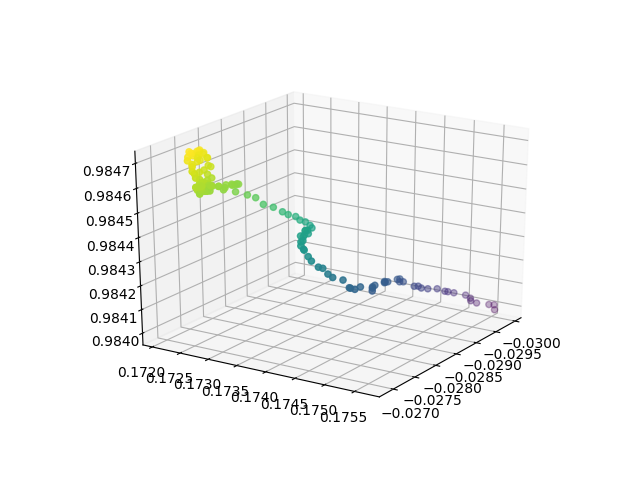

In [73]:
ax = plt.axes(projection='3d')
ax.scatter3D(xs, ys, zs, c=zs)